In [1]:
import matplotlib.pyplot as plt
import numpy as np

# K-Means Example
Copied from chapter 9, used to make sure I correctly understood the k-means clustering used in chapter 2, for the _ClusterSimilarity_ class.

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
def plot_kmeans_example(dataset, kmeans):
    # We want  to make a filled plot where each point is assigned the color of the closest cluster
    mins = dataset.min(axis=0) - 0.1
    maxs = dataset.max(axis=0) + 0.1
    # Define a grid of points so that all pairs of xx and yy defines the coordinates of all points (1'000 x 1'000 = 1'000'000 points) on our plot
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                         np.linspace(mins[1], maxs[1], 1000))
    # For each point of our grid, compute the closest cluster
    # xx.ravel() linearises xx so that it's a vector rather than a matrix
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    # Change the shape of z so that it's a matrix and not a vector anymore
    Z = Z.reshape(xx.shape)
    
    ## CONTOUR PLOT
    # Generate the filled plot, where all points have the color of the closest cluster
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2", zorder=1)
    # Plot the contour lines of the previous domain
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k', zorder=2)
    
    ## GENERAL PLOT
    # Plot the actual data
    plt.scatter(dataset[:, 0], dataset[:, 1], color=[0, 0, 0], s=1, zorder=3)

    ## CENTROIDS PLOTTING
    # Plot the centroids backgrounds (necessary to make them visible, as most points are close to the cluster center, they hide our cluster center by overcrowding
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=35, linewidths=8, color='w', alpha=0.9, zorder=10)
    # Plot the actual cluster center
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=2, linewidths=12, color='k', alpha=1, zorder=11)

In [4]:
# Define the centers of the blobs (otherwise the points are too bunched up and my resulting plot is not very easy to read!
blob_centers = np.array([[-2, -1], [-2, 2.5], [0, 0.5], [1.25, 1.6], [1.5, -2]])
# Generate the input dataset we'll use for the k-means example
X, y = make_blobs(n_samples=2000, random_state=117, centers = blob_centers)

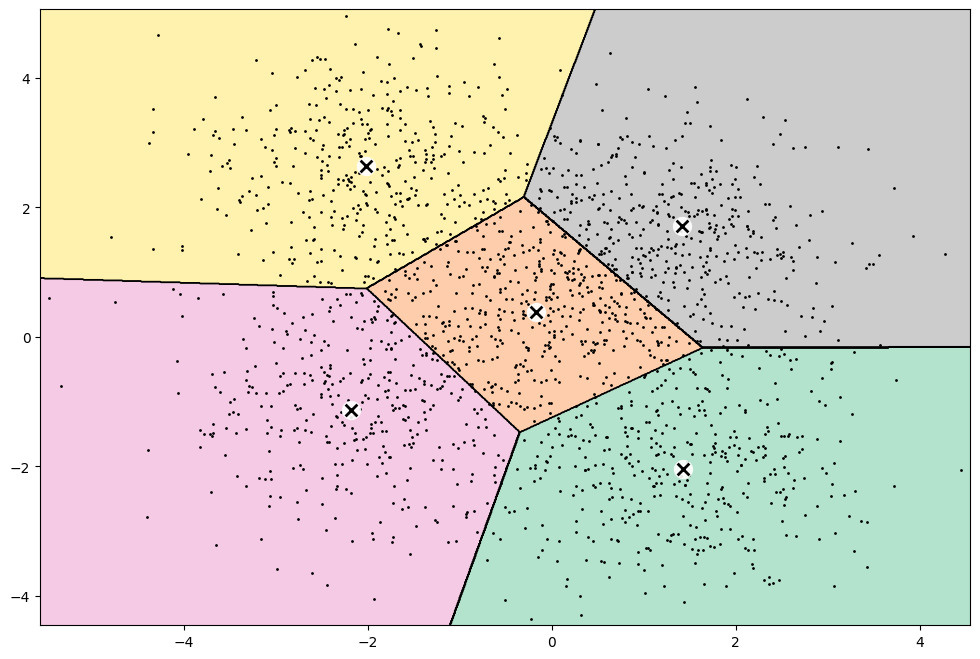

In [5]:
kmean = KMeans(n_clusters=5, random_state=42, n_init=10)
y_pred = kmean.fit_predict(X)

fig = plt.figure(figsize=(12, 8))
plot_kmeans_example(X, kmean)